In [1]:
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [12]:
bestDesc = pickle.load(open('./data/bestDescV1.pkl', 'rb'))
train = pickle.load(open('./dtTrain.pkl', 'rb'))
test = pd.read_csv("data/TestSetNoId.csv")

((74, 73), (19, 3775))

In [3]:
dfTrain = train.loc[:,bestDesc]
dfTest = test.loc[:,bestDesc]

dfTrain.shape, dfTest.shape

((74, 6), (19, 6))

In [4]:
# 0. Preparation Data
x_train = dfTrain.iloc[:,:]
x_test = dfTest.iloc[:,:]
y_train = train.iloc[:, [-1]]
y_test = test.iloc[:,[-1]]

In [6]:
scaler = MinMaxScaler()
scaler.fit(x_train)
scale_x_train = scaler.transform(x_train)
scale_x_test = scaler.transform(x_test)

In [7]:
model = SVR()
model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
model.fit(scale_x_train, y_train)

c:\users\muhammad fajar rizqi\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
y_train_pred = model.predict(scale_x_train)
y_test_pred = model.predict(scale_x_test)
y_train_pred, y_test_pred

(array([5.55473141, 5.32862569, 6.00275829, 6.78568706, 7.78362418,
        8.02052066, 7.00851697, 6.38109327, 7.84432851, 7.2122351 ,
        7.71614877, 7.57772971, 5.80418989, 6.38381864, 6.47150095,
        5.95448032, 7.91102314, 7.84185425, 8.08853784, 5.73820567,
        7.91102314, 7.82106893, 7.78611036, 7.0801708 , 7.46759118,
        5.97603172, 6.29427693, 7.98010163, 7.5944929 , 6.82741818,
        7.99124268, 6.40543761, 6.96294019, 6.05554425, 6.42334974,
        8.1593947 , 6.76141125, 7.19105673, 7.3439539 , 8.05454521,
        7.78023691, 6.40885375, 6.62105467, 6.0649106 , 7.92186545,
        7.55294786, 6.96787413, 6.55590228, 7.3339494 , 7.306947  ,
        7.51446008, 7.94629554, 7.60210914, 6.96861795, 7.62872305,
        7.00129413, 7.68503163, 7.12090323, 5.85311669, 6.34626913,
        7.76734923, 8.05453744, 8.1460362 , 7.92686017, 6.56785378,
        7.00147588, 6.74342245, 8.05349474, 6.63295322, 8.04104575,
        7.53044795, 7.3162042 , 7.90018103, 5.82

In [14]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

r2_train, r2_test

(0.7875026347515465, -0.556032149228072)

In [18]:
for i in range(len(y_test)):
    print(y_test.values[i], y_test_pred[i])

[6.71] 6.25455929189502
[7.119] 7.976732696737847
[6.347] 6.260725133832136
[6.057] 7.916355760881013
[6.108] 7.624752104399285
[6.468] 6.313608268152809
[7.301] 6.677452707286358
[7.26] 6.6835195201725845
[6.921] 6.876962468360073
[6.824] 7.102289680228559
[6.468] 6.981407291775348
[6.971] 7.165885017140978
[6.824] 6.6294530258908
[7.523] 6.98605036895559
[7.337] 6.992706874562003
[8.] 7.674808824118747
[7.62] 7.924504765070247
[7.222] 8.076108993864787
[8.046] 8.049134943300364


In [12]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE :" , rmse)

RMSE : 0.5290859329810076


In [15]:
r2 = r2_score(y_test,pred)
print("r2 :",r2)

r2 : 0.10110344648328928


In [ ]:
# Testing 1 descriptor
df = pd.DataFrame(list(zip(dfDesc.iloc[:,0], dtTrain.iloc[:,-1])), 
               columns =[dfDesc.columns.values[1], dtTrain.columns.values[-1]])
df

In [ ]:
# Get x & y for plot
X = df.iloc[:,0]
y = df.iloc[:,-1]
X = X.to_numpy()
X = X.reshape(-1,1)

In [ ]:
### SVM Here

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=1000, gamma=0.1)
svr_poly = SVR(kernel='poly', C=1000, gamma=0.1, degree=0, epsilon=.1,
               coef0=1)

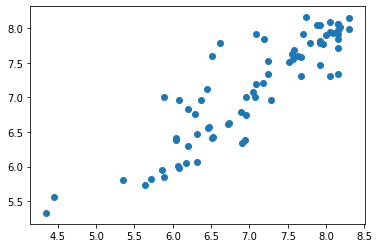

In [15]:
plt.scatter(y_train,y_train_pred)